<a href="https://colab.research.google.com/github/miketreyu/data-science/blob/main/Ejercicios_visualizaci%C3%B3n_%2B_preprocesamiento_terminado1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos a trabajar con datos de verdad. Podéis encontrar una serie de conjuntos de datos que vamos a meter en dataframes:

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Una forma cómoda de cargar los datos puede ser subirlos en formato .csv a un *gist* de *GitHub* y utilizar la función *read_csv* de pandas pasándole la url del *gist*.<br></br>
No va a hacer falta que lo hagáis en estos ejercicios, pero está bien saberlo para el futuro. Os explicaremos bien cómo se hace cuando os toque usarlo.

In [38]:
gasolina_url = "https://gist.githubusercontent.com/w-dan/4a788daed122583e3cabd7b81a2b3aea/raw/9129ed5974093d73623fb653899f385325c0e18e/gas.csv"
felicidad_url = "https://gist.githubusercontent.com/w-dan/43e1bb780e5a6623764f78925aa31337/raw/ecc871ef48fc16a8364ce06d7e72a7a4ce07f790/happiness.csv"

In [39]:
df_gasolina = pd.read_csv(gasolina_url)
df_felicidad = pd.read_csv(felicidad_url)

Visualizamos el dataframe de los precios mensuales de gasolina, por ejemplo:

In [40]:
df_gasolina

,Fiscal Year,Fiscal Week,Current Year Production,Previous Year Production,Current Year Cumulative Production
0,2023,16,2393748000,2417856000,3.964972e+10
1,2023,15,2367876000,2324364000,3.725597e+10
2,2023,14,2222052000,2402568000,3.488810e+10
3,2023,13,2209116000,2858856000,3.266605e+10
4,2023,12,2742138000,2641884000,3.045693e+10
...,...,...,...,...,...
168,2020,5,2688630000,2675106000,1.391590e+10
169,2020,4,2876496000,2723028000,1.122727e+10
170,2020,3,2819460000,2741256000,8.350776e+09
171,2020,2,2750076000,2699508000,5.531316e+09


In [41]:
df_felicidad

,Overall rank_2019,Country or region,Score_2019,Rank_2018,Score_2018,Rank_2017,Score_2017,Rank_2016,Score_2016,2020.Rank,2020_Score,Rank_2022,Score_2022,2021. score,2021.Rank
0,1,Finland,7.769,1.0,7.632,5.0,7.469,5.0,7.413,1.0,7.809,1.0,7.842,7.842,1.0
1,2,Denmark,7.600,3.0,7.555,2.0,7.522,1.0,7.526,2.0,7.646,2.0,7.620,7.620,2.0
2,3,Norway,7.554,2.0,7.594,1.0,7.537,4.0,7.498,5.0,7.488,6.0,7.392,7.392,6.0
3,6,Switzerland,7.480,5.0,7.487,4.0,7.494,2.0,7.509,3.0,7.560,3.0,7.571,7.571,3.0
4,4,Iceland,7.494,4.0,7.495,3.0,7.504,3.0,7.501,4.0,7.504,4.0,7.554,7.554,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,155,Central African Republic,3.083,155.0,3.083,155.0,2.693,NaN,NaN,149.0,3.476,NaN,NaN,NaN,NaN
152,39,Trinidad & Tobago,6.192,38.0,6.192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,19,United States of America,6.892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,120,Gambia,4.516,NaN,NaN,NaN,NaN,NaN,NaN,113.0,4.751,96.0,5.051,5.051,98.0


Poco legible, ¿verdad? Vamos a intentar hacerlo un poco más visible.

## Ejercicio 1

Representa gráficamente las columnas "Current Year Production" y "Current Year Cumulative Production". ¿Qué distribución dirías que siguen por su aspecto? ¿Borrarías datos? En caso afirmativo, ¿cuáles?
*Esto aplica para todos los ejercicios, pero puedes insertar tantas celdas de código como necesites.*

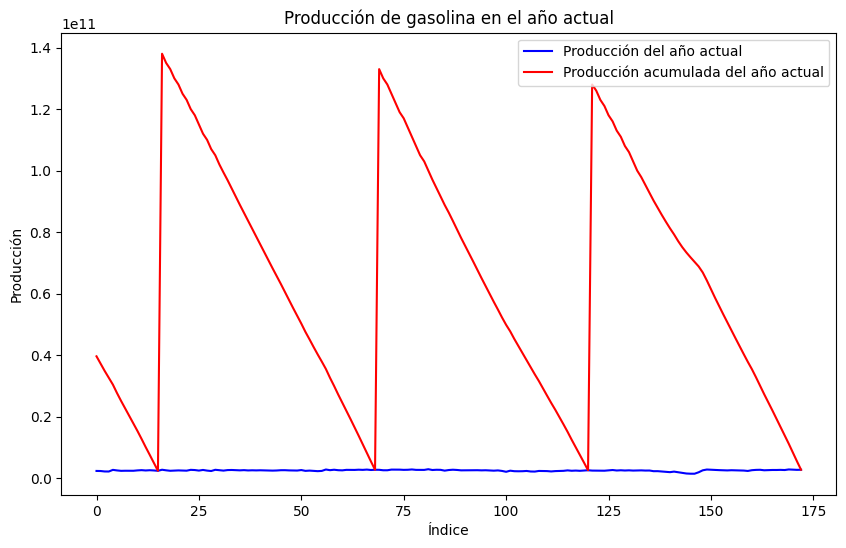

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(df_gasolina['Current Year Production'], color='blue', label='Producción del año actual')

plt.plot(df_gasolina['Current Year Cumulative Production'], color='red', label='Producción acumulada del año actual')

plt.xlabel('Índice')
plt.ylabel('Producción')
plt.title('Producción de gasolina en el año actual')

plt.legend()

plt.show()




## Ejercicio 2

Crea una nueva columna "Diferencia" en el dataframe que contenga la diferencia entre la cantidad producida en el año actual (Current Year Production) y el año anterior (Previous Year Production).

In [43]:
df_gasolina['Diferencia'] = df_gasolina['Current Year Production'] - df_gasolina['Previous Year Production']
print(df_gasolina)

     Fiscal Year  Fiscal Week  Current Year Production  \
0           2023           16               2393748000   
1           2023           15               2367876000   
2           2023           14               2222052000   
3           2023           13               2209116000   
4           2023           12               2742138000   
..           ...          ...                      ...   
168         2020            5               2688630000   
169         2020            4               2876496000   
170         2020            3               2819460000   
171         2020            2               2750076000   
172         2020            1               2781240000   

     Previous Year Production  Current Year Cumulative Production  Diferencia  
0                  2417856000                        3.964972e+10   -24108000  
1                  2324364000                        3.725597e+10    43512000  
2                  2402568000                        3.488810e+

## Ejercicio 3

## 3.1
Acota los valores de la columna "Current Year Cumulative Production" entre 0 y 1.

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_gasolina["Current Year Cumulative Production"] = scaler.fit_transform(df_gasolina[["Current Year Cumulative Production"]])

print(df_gasolina)


     Fiscal Year  Fiscal Week  Current Year Production  \
0           2023           16               2393748000   
1           2023           15               2367876000   
2           2023           14               2222052000   
3           2023           13               2209116000   
4           2023           12               2742138000   
..           ...          ...                      ...   
168         2020            5               2688630000   
169         2020            4               2876496000   
170         2020            3               2819460000   
171         2020            2               2750076000   
172         2020            1               2781240000   

     Previous Year Production  Current Year Cumulative Production  Diferencia  
0                  2417856000                            0.274526   -24108000  
1                  2324364000                            0.256868    43512000  
2                  2402568000                            0.2394

### 3.2
¿Qué columnas eliminarías por no aportar nada de información?

In [45]:
df_gasolina.drop('Fiscal Week', axis=1)

,Fiscal Year,Current Year Production,Previous Year Production,Current Year Cumulative Production,Diferencia
0,2023,2393748000,2417856000,0.274526,-24108000
1,2023,2367876000,2324364000,0.256868,43512000
2,2023,2222052000,2402568000,0.239402,-180516000
3,2023,2209116000,2858856000,0.223011,-649740000
4,2023,2742138000,2641884000,0.206716,100254000
...,...,...,...,...,...
168,2020,2688630000,2675106000,0.084702,13524000
169,2020,2876496000,2723028000,0.064869,153468000
170,2020,2819460000,2741256000,0.043651,78204000
171,2020,2750076000,2699508000,0.022853,50568000


### 3.3

¿Podrías aplicar un StandardScaler a alguna de las columnas del DataFrame? ¿Por qué?

In [46]:
import numpy as np
from sklearn.preprocessing import StandardScaler

print("Media: ", df_gasolina.mean(axis=0))
print("Desviación típica: ", df_gasolina.std(axis=0))

Media:  Fiscal Year                           2.021191e+03
Fiscal Week                           2.498844e+01
Current Year Production               2.539688e+09
Previous Year Production              2.580181e+09
Current Year Cumulative Production    4.508209e-01
Diferencia                           -4.049383e+07
dtype: float64
Desviación típica:  Fiscal Year                           9.726050e-01
Fiscal Week                           1.543365e+01
Current Year Production               2.351308e+08
Previous Year Production              3.182352e+08
Current Year Cumulative Production    2.869877e-01
Diferencia                            4.318600e+08
dtype: float64


## Ejercicio 4

### 4.1

En el DataFrame `df_felicidad`, convierte la columna "Country or region" a un valor numérico. Utiliza los dos métodos que has aprendido.

In [48]:
df_felicidad

,Overall rank_2019,Country or region,Score_2019,Rank_2018,Score_2018,Rank_2017,Score_2017,Rank_2016,Score_2016,2020.Rank,2020_Score,Rank_2022,Score_2022,2021. score,2021.Rank
0,1,Finland,7.769,1.0,7.632,5.0,7.469,5.0,7.413,1.0,7.809,1.0,7.842,7.842,1.0
1,2,Denmark,7.600,3.0,7.555,2.0,7.522,1.0,7.526,2.0,7.646,2.0,7.620,7.620,2.0
2,3,Norway,7.554,2.0,7.594,1.0,7.537,4.0,7.498,5.0,7.488,6.0,7.392,7.392,6.0
3,6,Switzerland,7.480,5.0,7.487,4.0,7.494,2.0,7.509,3.0,7.560,3.0,7.571,7.571,3.0
4,4,Iceland,7.494,4.0,7.495,3.0,7.504,3.0,7.501,4.0,7.504,4.0,7.554,7.554,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,155,Central African Republic,3.083,155.0,3.083,155.0,2.693,NaN,NaN,149.0,3.476,NaN,NaN,NaN,NaN
152,39,Trinidad & Tobago,6.192,38.0,6.192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,19,United States of America,6.892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,120,Gambia,4.516,NaN,NaN,NaN,NaN,NaN,NaN,113.0,4.751,96.0,5.051,5.051,98.0


In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

#OneHotEncoder().fit_transform(df_felicidad[['Country or region']]).toarray()
#df_felicidad = np.array(df_felicidad)
#OneHotEncoder().fit_transform(df_felicidad).toarray()

encoder = OrdinalEncoder()
encoded_countries = encoder.fit_transform(df_felicidad[['Country or region']])

df_felicidad['Country or region'] = encoded_countries

df_felicidad



,Overall rank_2019,Country or region,Score_2019,Rank_2018,Score_2018,Rank_2017,Score_2017,Rank_2016,Score_2016,2020.Rank,2020_Score,Rank_2022,Score_2022,2021. score,2021.Rank
0,1,44.0,7.769,1.0,7.632,5.0,7.469,5.0,7.413,1.0,7.809,1.0,7.842,7.842,1.0
1,2,36.0,7.600,3.0,7.555,2.0,7.522,1.0,7.526,2.0,7.646,2.0,7.620,7.620,2.0
2,3,106.0,7.554,2.0,7.594,1.0,7.537,4.0,7.498,5.0,7.488,6.0,7.392,7.392,6.0
3,6,133.0,7.480,5.0,7.487,4.0,7.494,2.0,7.509,3.0,7.560,3.0,7.571,7.571,3.0
4,4,58.0,7.494,4.0,7.495,3.0,7.504,3.0,7.501,4.0,7.504,4.0,7.554,7.554,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,155,24.0,3.083,155.0,3.083,155.0,2.693,NaN,NaN,149.0,3.476,NaN,NaN,NaN,NaN
152,39,140.0,6.192,38.0,6.192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,19,148.0,6.892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,120,47.0,4.516,NaN,NaN,NaN,NaN,NaN,NaN,113.0,4.751,96.0,5.051,5.051,98.0


### 4.2

¿Cuál de los dos métodos te parece mejor? ¿Por qué?

In [51]:
#En este y la mayoría de casos, aunque más feo de forma visual,
#hacer que los datos no tengan un orden de importancia si no lo necesitan es esencial

# Ejercicio 5

### 5.1

Averigua si el DataFrame `df_felicidad` tiene elementos nulos. Consigue todas las filas en las que haya elementos nulos.

In [53]:
filas_con_nulos = df_felicidad.isnull().any(axis=1)

filas_con_nulos = filas_con_nulos[filas_con_nulos].index

print(filas_con_nulos)

Index([ 27,  35,  42,  68,  78,  84,  86,  87,  94,  99, 103, 108, 118, 120,
       132, 139, 146, 147, 148, 151, 152, 153, 154, 155],
      dtype='int64')


### 5.2

Elimina los nulos de `df_felicidad`.

In [55]:
#df_felicidad.dropna()

,Overall rank_2019,Country or region,Score_2019,Rank_2018,Score_2018,Rank_2017,Score_2017,Rank_2016,Score_2016,2020.Rank,2020_Score,Rank_2022,Score_2022,2021. score,2021.Rank
0,1,44.0,7.769,1.0,7.632,5.0,7.469,5.0,7.413,1.0,7.809,1.0,7.842,7.842,1.0
1,2,36.0,7.600,3.0,7.555,2.0,7.522,1.0,7.526,2.0,7.646,2.0,7.620,7.620,2.0
2,3,106.0,7.554,2.0,7.594,1.0,7.537,4.0,7.498,5.0,7.488,6.0,7.392,7.392,6.0
3,6,133.0,7.480,5.0,7.487,4.0,7.494,2.0,7.509,3.0,7.560,3.0,7.571,7.571,3.0
4,4,58.0,7.494,4.0,7.495,3.0,7.504,3.0,7.501,4.0,7.504,4.0,7.554,7.554,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,147,54.0,3.597,148.0,3.582,145.0,3.603,136.0,4.028,142.0,3.721,140.0,3.615,3.615,143.0
144,148,16.0,3.488,146.0,3.590,142.0,3.766,137.0,3.974,147.0,3.479,143.0,3.467,3.467,146.0
145,154,0.0,3.203,145.0,3.632,141.0,3.794,154.0,3.360,153.0,2.567,146.0,2.523,2.523,149.0
149,152,118.0,3.334,151.0,3.408,151.0,3.471,152.0,3.515,150.0,3.312,144.0,3.415,3.415,147.0


### 5.3

Sustituye todos los nulos que haya en la columna "Score_2018" por la media de los valores de esa columna.

In [56]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

#df_felicidad['Score_2018'] =
df_felicidad['Score_2018'].fillna(df_felicidad['Score_2018'].mean())
#print(df_felicidad)

0      7.632
1      7.555
2      7.594
3      7.487
4      7.495
       ...  
151    3.083
152    6.192
153    5.382
154    5.382
155    5.382
Name: Score_2018, Length: 156, dtype: float64